### Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

Enron Corporation  was U.S. energy-trading and utilities company  founded in 1985. It achieved spectacular success in a very short period of time. This company claimed revenues of around 101 billion dollars in 2000. In only 15 years, this company was named America’s Most innovative Company for six consecutive years by Fortune 500.  Company stock price rose to 90 dollars. However, this success of Enron was short-lived. It started falling off more rapidly and bankruptcy was filed on Dec.2, 2001. Federal Energy Regulatory Commission investigated after the company's collapse and approximately 600,000 emails generated by employees of the Enron Corporation was made public which is called enron corpus.

In this project, main goal is to build a classification algorithm to predict a person of interest identifier (POI) based on email and financial features in the enron dataset involving 146 enron executives. A POI is anyone who is indicted, settled without admitting the guilt and testified in exchange for immunity. Predicted POI from this analysis and actual POI in the dataset will be compared to validate my prediction. Such model could be used to find additional suspects who were not indicted during the original investigation, or to find persons of interest during fraud investigations at other businesses.
This study involves:
-Exploration of Enron dataset
-Selection of Features 
-Selection of Algorithms
-Validation and Evaluation


In [1]:

import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import pandas as pd
import sys
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score,precision_score
from time import time
from sklearn.grid_search import GridSearchCV

sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit


/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
enron_data = pd.DataFrame.from_dict(data_dict, orient = 'index')

## Exploration of Enron Dataset
Dataset was investigated. First structure of the dataset was examined.

In [4]:
enron_data.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [5]:
#structure of enron_data set
print "There were", len(enron_data), "persons involved."

There were 146 persons involved.


In [6]:
print data_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [7]:
print data_dict["GLISAN JR BEN F"]



{'salary': 274975, 'to_messages': 873, 'deferral_payments': 'NaN', 'total_payments': 1272284, 'exercised_stock_options': 384728, 'bonus': 600000, 'restricted_stock': 393818, 'shared_receipt_with_poi': 874, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 778546, 'expenses': 125978, 'loan_advances': 'NaN', 'from_messages': 16, 'other': 200308, 'from_this_person_to_poi': 6, 'poi': True, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 71023, 'email_address': 'ben.glisan@enron.com', 'from_poi_to_this_person': 52}


In [8]:
(enron_data['poi'].value_counts()[True])

18

In [9]:
enron_data.describe().transpose()

,count,unique,top,freq
salary,146,95,NaN,51
to_messages,146,87,NaN,60
deferral_payments,146,40,NaN,107
total_payments,146,126,NaN,21
exercised_stock_options,146,102,NaN,44
bonus,146,42,NaN,64
restricted_stock,146,98,NaN,36
shared_receipt_with_poi,146,84,NaN,60
restricted_stock_deferred,146,19,NaN,128
total_stock_value,146,125,NaN,20


Enron dataset consists of lot of missing values (NaN). All the features have at least one missing values. Some features have more than 50% of their values missing, as shown by the table above. NaNs are replaced by 0 for training our algorithm later.

In [10]:
enron_data.replace(to_replace='NaN', value=0.0, inplace=True)

Scatter plots are great tools for finding outliers. So first I plotted salary against bonus in a scatter plot and looked for the data distribution. 

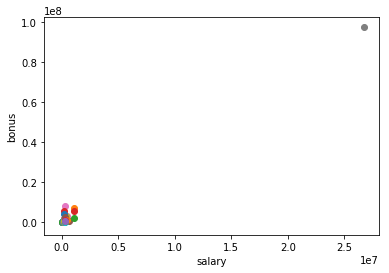

In [11]:
from IPython.display import Image
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

The above plot allowed to see an outlier named 'Total'which was sum of all the data points in the given plot(artifact in scatterplot). So this outlier was excluded from our analysis manually. There were several other high number values (outliers) which could possibly represent POIs, thus were included in the dataset. 
Scatter plot was drawn after removing outliers as below.

In [12]:
##2 removing outliers 
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)

#remove NAN from dataset
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))
outliers_final = (sorted(outliers, key=lambda x:x[1], reverse = True)[:10])
print outliers_final

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037), ('WHALLEY LAWRENCE G', 510364), ('DERRICK JR. JAMES V', 492375), ('FASTOW ANDREW S', 440698), ('SHERRIFF JOHN R', 428780), ('RICE KENNETH D', 420636), ('CAUSEY RICHARD A', 415189)]


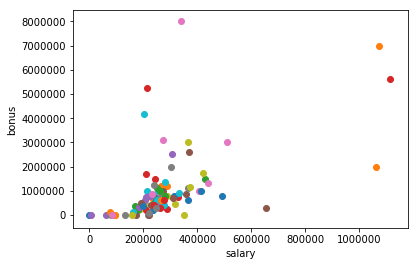

In [13]:
#scatterplot after outlier removal

features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

# Selection of Feature/Feature engineering 
### What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]


Feature selection in machine learning is selection of a feature which potentially would show some sort of pattern in the prediction analysis. Enron dataset consists two set of features - financial(salary, bonus, stock etc) and communication(to and from emails). Here I am more interested in emails those involve POIs. The assumption is that "Communication between POI and POI would be more frequent than between POI and non-POIs". I attempted to create two features, fractions of emails this person gets from POI(fraction_from_poi) and fraction of emails this person sends to POI(fraction_to_poi).

fraction_from_poi = number of emails this person gets from POI/total number of from
messages

fraction_to_poi = number of emails this person sends to POI/total number sent messages

If email data is 'NaN', ratio is set to 0.

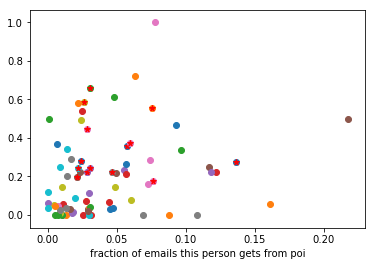

In [14]:
#3 create new features
#new features: fraction_to_poi = fraction of emails sent to POIs, fraction_from_poi = fraction of emails received  from POI
def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
fraction_from_poi = dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi = dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["fraction_from_poi"]=fraction_from_poi[count]
    data_dict[i]["fraction_to_poi"]=fraction_to_poi[count]
    count +=1

    
features_list = ["poi", "fraction_from_poi", "fraction_to_poi"]    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.show()


In [15]:
print features_list

['poi', 'fraction_from_poi', 'fraction_to_poi']


To select more impactful features for classification, 'feature_importances' attribute of “Decision Tree” was used. Features were ranked and selection process was half manual  process. First all the possible features were included in features_list and then selection was done on the basis of feature ranking.

In [16]:


features_list = ["poi", "salary", "bonus", "fraction_from_poi", "fraction_to_poi",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
#deploying feature selection

from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)



##try Decision tree 
from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print'Decision Tree'
print 'accuracy before tuning', score
print "Decision tree algorithm time:", round(time()-t0, 3), "s"

importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(16):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])




    




Decision Tree
accuracy before tuning 0.666666666667
Decision tree algorithm time: 0.007 s
Feature Ranking: 
1 feature salary (0.174317879326)
2 feature bonus (0.158290984378)
3 feature fraction_from_poi (0.14622972935)
4 feature fraction_to_poi (0.128198757764)
5 feature deferral_payments (0.118337314859)
6 feature total_payments (0.0955181169023)
7 feature loan_advances (0.0879795396419)
8 feature restricted_stock_deferred (0.0534161490683)
9 feature deferred_income (0.0377115287109)
10 feature total_stock_value (0.0)
11 feature expenses (0.0)
12 feature exercised_stock_options (0.0)
13 feature long_term_incentive (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)



We select and keep least number of features which hold maximum information and show pattern and trends in data.
From here I selected 9 features:
["salary", "bonus", "fraction_from_poi", "fraction_to_poi", "deferral_payments", "total_payments", "loan_advances", "restricted_stock_deferred", "deferred_income"]
Accuracy for this feature set was 0.73. Recall and precision scores were too low, so I manually chose features which gave recall and precision score higher than 0.3.
My final feature selections were:
["fraction_from_poi", "fraction_to_poi","shared_receipt_with_poi"]

## Algorithm selection and tuning

In [17]:

features_list = ["poi", "fraction_from_poi", "fraction_to_poi","shared_receipt_with_poi"]


##try Naive Bayes

t0 = time()
clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print "Naive Bayes recall score", (recall_score(labels_test,pred))
print "Naive Bayes precision score", (precision_score(labels_test,pred))
#print accuracy #(clf.score(features_test, labels_test))
accuracy = accuracy_score(pred,labels_test)
print 'accuracy', accuracy
print "NB algorithm time:", round(time()-t0, 3), 's'



###Adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split = 40),
                         algorithm="SAMME",
                         n_estimators=200)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

acc =  accuracy_score(pred,labels_test)
print "ADABOOST:"
print acc
print "AB Recall Score" + str(recall_score(labels_test, pred))
print "AB Precision Score" + str(precision_score(labels_test, pred))




Naive Bayes recall score 0.5
Naive Bayes precision score 0.181818181818
accuracy 0.266666666667
NB algorithm time: 0.01 s
ADABOOST:
0.8
AB Recall Score0.25
AB Precision Score1.0


### What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? 
### What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune?

Naive Bayes (accuracy = 0.27), decision tree (accuracy = 0.67) and adaboost(accuracy= 0.73) algorithms were applied. Accuracy was lower with Naive Bayes, could probably due to distribution pattern of features in the dataset. Adaboost showed decent accuracy but had recall score of less than 0.3. Here, Decision tree would be more appropriate algorithm for POI identifier, since as it has accuracy of 0.67 before any tuning. Besides it is more efficient in finding irregular decision boundaries and does not need feature scaling. To optimize its performance, parameters like min_sample_split could be varied.

According to the enron dataset there were only 18 POIs. Since there were few POI subjects in the dataset, precision and recall score were considered better evaluater.
I chose decision tree as a final algorithm.
After final algorithm was chosen, algorithm parameter min_samples_split was tuned manually. We varied the min_samples_split from 2 to 7 and compared the recall and precision score. We found recall and precision score did not change between numbers 3 to 7. 

In [18]:
### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)

### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )


done in 0.006s
Validating algorithm:
accuracy after tuning =  0.733333333333
precision =  0.5
recall =  0.5


In [19]:
#t0 = time()
#clf = DecisionTreeClassifier(min_samples_split=2)
#clf = clf.fit(features_train,labels_train)
#pred= clf.predict(features_test)
#print("done in %0.3fs" % (time() - t0))

#acc=accuracy_score(labels_test, pred)

#print "Validating algorithm:"
#print "accuracy after tuning = ", acc

#function for calculation ratio of true positives
#out of all positives (true + false)
#print 'precision = ', precision_score(labels_test,pred)

#function for calculation ratio of true positives
#out of true positives and false negatives
#print 'recall = ', recall_score(labels_test,pred)

min_samples_split    precision    recall
      2                0.4         0.67
      3                0.5         0.67
      4                0.5         0.67
      5                0.67        0.67
      6                0.67        0.67
      7                0.67        0.67
      

## Analysis Validation and Performance
### What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?

Validation is the process where we determine the robustness of our predictive models. 
In our case, analysis was validated using K-fold validation. Such validation process enhances the likelihood that our algorithm will be reliable and robust. A classic mistake in validation process is called over-fitting, where the model is trained and it performs very well on the training dataset, but is actually worse on the cross-validation and test datasets. 

In [20]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi", "fraction_from_poi", "fraction_to_poi", "shared_receipt_with_poi"]


### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

accuracy before tuning  0.857142857143
Decision tree algorithm time: 0.003 s
done in 0.001s
Validating algorithm:
accuracy after tuning =  0.892857142857
precision =  0.5
recall =  0.666666666667


## Discussion and Conclusions

 As this dataset was small and imbalanced dataset, accuracy was not a good metric for evaluating the algorithm. So, we used different scoring metric; precision and recall score. Decision Tree classifier showed the precision score and recall score higher than 0.3. Comparatively, Adaboost and Naive Bayes showed low accuracy and low precision score.

### Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.

I chose Decision Tree as a final algorithm to predict whether POI identified through this test is indeed POI. Feature scaling was not done as it is not required while using Decision Tree. The precision score is the probability that the person identified as POI is infact POI. In our case, precision = 0.67 means 67 percent of the time POI identified in the test would be the real POI whereas 33% of the time this test could flag a wrong person. These numbers could be increased by changing or exploring more into email information. Finally, Our prediction was validated by using K-fold validation.

Thus in this project, I used machine learning algorithms to identify POI in the Enron dataset. Naive Bayes, Adaboost and Decision Tree algorithms were compared. Decision Tree showed best precision and recall score among them showing 0.67 and 0.67 respectively. Small size of data set and even smaller number of POI made this analysis more challanging.

## References:
https://en.wikipedia.org/wiki/Enron_Corpus
https://www.cs.cmu.edu/~enron/
https://www.technologyreview.com/s/515801/the-immortal-life-of-the-enron-e-mails/
https://classroom.udacity.com/nanodegrees/nd002/parts/0021345409/modules/317428862475461/lessons/3174288624239847/project
https://discussions.udacity.com/c/nd002-intro-to-machine-learning
